Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---
#


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict? X 
- [ ] Is your problem regression or classification? Classification X 
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced? Yes, the classes are imbalanced
    
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [383]:
#library versions
!pip install -U scikit-learn
!python -m pip show scikit-learn


Requirement already up-to-date: scikit-learn in /Users/johnrivera/.virtualenvs/jupyter/lib/python3.7/site-packages (0.23.1)
Name: scikit-learn
Version: 0.23.1
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: /Users/johnrivera/.virtualenvs/jupyter/lib/python3.7/site-packages
Requires: scipy, numpy, joblib, threadpoolctl
Required-by: sklearn, category-encoders


In [384]:
#instantiate classes

In [385]:
#importing data
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/JonRivera/JonRivera.github.io/master/Unit2/Buil_Week/Data_Sets/Hotel_Bookings/hotel_bookings.csv")

In [386]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [387]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [388]:

df['reservation_status'] == 'No_how'

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Name: reservation_status, Length: 119390, dtype: bool

In [389]:

def wrangle(df):
    df = df.copy()
    #drop unecessary columns, or columns that seem to have little impact on target
    df = df.drop(['company', 'agent','arrival_date_week_number'],axis = 1)
    df = df.dropna(axis=0)  
    #set date column to index
    #doesn't add any substantial info, and has high cardinality. 
    #arrivate_date year,month, day already include this info ..
    df.set_index(pd.to_datetime(df['reservation_status_date']), inplace = True)
    df = df.drop(['reservation_status_date'], axis=1)
    #I am treating cancelations as people who canceled or did not show
    #on there arrival date --- it was assumend the hotel would cancel there stay 
    
    df['reservation_status'] =  df['reservation_status'].replace({'No-Show':'Canceled'})
    return df
df = wrangle(df)


#predicting wheather a hotel will experience cancellations or not
#goal: make an app hotels can use to determine wheather or not they will experience cancellations


In [390]:
#get train, validate,and test subsets
train = df[df['arrival_date_year']==2015].copy()
val = df[df['arrival_date_year']==2016].copy()
test = df[df['arrival_date_year'] == 2017].copy()
train.shape, val.shape, test.shape

((21859, 28), (56435, 28), (40604, 28))

In [391]:
train.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
reservation_status_date,,,,,,,,,,,,,,,,,,,,,
2015-07-01,Resort Hotel,0,342,2015,July,1,0,0,2,0.0,...,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out
2015-07-01,Resort Hotel,0,737,2015,July,1,0,0,2,0.0,...,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out
2015-07-02,Resort Hotel,0,7,2015,July,1,0,1,1,0.0,...,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out
2015-07-02,Resort Hotel,0,13,2015,July,1,0,1,1,0.0,...,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out
2015-07-03,Resort Hotel,0,14,2015,July,1,0,2,2,0.0,...,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out


In [392]:
train.describe(exclude='number')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,21859,21859,21859,21859,21859,21859,21859,21859,21859,21859,21859
unique,2,6,5,98,6,5,9,11,3,4,2
top,City Hotel,September,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,13663,5084,17106,13303,6148,17691,17614,14376,18202,11319,13753


In [393]:
#feature selection
# is_canceled is also a target vector, reveals reservation_status implicitly ... is leaking information of target
def features_select(df):    
    target = 'reservation_status'
    #creating subsets of features, splitted between numerical and categorical
    train_features =  df.drop(columns = [target, 'is_canceled'],axis =1)
    numeric_features = train_features.select_dtypes(include='number').columns.tolist()
    cardinality = train_features.select_dtypes(exclude = 'number').nunique()
    categorical_features = cardinality.index.tolist()
    #combine lists to extrapolate features of interest
    features = numeric_features + categorical_features
    return features
features = features_select(df)
features

['lead_time',
 'arrival_date_year',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type']

In [394]:
#def feature_engineering(X):

In [395]:
#seperating X matrices and correspind y vectors
target = 'reservation_status'
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]
X_val= val[features]
y_val = val[target]
X_train.shape,y_train.shape,X_val.shape, y_val.shape

((21859, 26), (21859,), (56435, 26), (56435,))

In [396]:
#baselines
y_train.value_counts(normalize=True)


Check-Out    0.629169
Canceled     0.370831
Name: reservation_status, dtype: float64

In [397]:
y_val.value_counts(normalize=True)


Check-Out    0.640064
Canceled     0.359936
Name: reservation_status, dtype: float64

In [398]:
y_train.value_counts()

Check-Out    13753
Canceled      8106
Name: reservation_status, dtype: int64

In [399]:
type(y_train)

pandas.core.series.Series

In [400]:
y_train.value_counts()

Check-Out    13753
Canceled      8106
Name: reservation_status, dtype: int64

In [401]:
#instantitate classes
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import category_encoders as ce
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV

In [402]:
#identify hyper parameters before research cv
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [403]:
#Build pipeline using RadnomSearchCV
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# pipeline = make_pipeline(
#     ce.OrdinalEncoder(),
#     SimpleImputer(strategy='mean'),
#     RandomForestClassifier(n_jobs = -1, random_state=40)

# )

# param_distributions = { 
#     'randomforestclassifier__n_estimators': [100]
#     'randomforestclassifier__criterion': ['gini', 'entropy'],
#     'randomforestclassifier__max_features': [5,10,20],
#     'randomforestclassifier__min_samples_split': [5,10,15,20],
#     'randomforestclassifier__min_samples_leaf': [2]
# }
# search = RandomizedSearchCV(
#     pipeline, 
#     param_distributions = param_distributions,
#     n_iter = 10,
#     cv=10,
#     scoring ='accuracy',
#     verbose = 1,
#     return_train_score = True,
#     n_jobs = -1
# )

# search.fit(X_train, y_train)
# print('Cross-validation Best Score', search.best_score_)
# print('Best Estimator:' ,search.best_params_)
# print('Best Model', search.best_estimator_)

In [404]:
 model = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='mean'),
    RandomForestClassifier(n_jobs=-1, n_estimators = 100,random_state=40,class_weight = 'balanced'
)
)
model.fit(X_train,y_train)


Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['hotel', 'arrival_date_month', 'meal',
                                      'country', 'market_segment',
                                      'distribution_channel',
                                      'reserved_room_type',
                                      'assigned_room_type', 'deposit_type',
                                      'customer_type'],
                                mapping=[{'col': 'hotel',
                                          'data_type': dtype('O'),
                                          'mapping': Resort Hotel    1
City Hotel      2
NaN            -2
dtype: int64},
                                         {'col': 'arrival_date_month',
                                          'data_type...
                                         {'col': 'deposit_type',
                                          'data_type': dtype('O'),
                                          'mapping': No Depos

Evaluation Metrics

In [405]:
print('Training Accuracy:', model.score(X_train, y_train))
print('Validation Accuracy:',model.score(X_val, y_val))


Training Accuracy: 0.9919483965414704
Validation Accuracy: 0.774962346061841


In [406]:
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

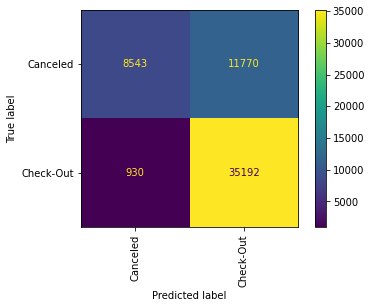

In [407]:
#From the confusion matrix we can see the model doesn't do a good job at classifying the minority class.
plot_confusion_matrix(model, X_val, y_val, values_format='.0f', xticks_rotation='vertical');

In [408]:
y_pred = model.predict(X_val)

In [409]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

    Canceled       0.90      0.42      0.57     20313
   Check-Out       0.75      0.97      0.85     36122

    accuracy                           0.77     56435
   macro avg       0.83      0.70      0.71     56435
weighted avg       0.80      0.77      0.75     56435



In [410]:
y_val.shape

(56435,)

In [411]:
len(y_pred_probab)

56435

In [412]:
y_pred_probab = model.predict_proba(X_val)
roc_auc_score(y_val,y_pred_probab[:,1])

0.7722215867163635

In [413]:
roc_auc_score(y_val,y_pred_probab[:,0])

0.2277783921591655

In [414]:
y_train

reservation_status_date
2015-07-01    Check-Out
2015-07-01    Check-Out
2015-07-02    Check-Out
2015-07-02    Check-Out
2015-07-03    Check-Out
                ...    
2015-08-26    Check-Out
2015-10-16    Check-Out
2015-12-13    Check-Out
2015-12-17    Check-Out
2015-10-03    Check-Out
Name: reservation_status, Length: 21859, dtype: object

In [415]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
# Binarize the output
y_train = label_binarize(y_train, classes=['Check-Out' , 'Canceled'])
y_test = label_binarize(y_test, classes=['Check-Out' , 'Canceled'])
y_val = label_binarize(y_val, classes=['Check-Out' , 'Canceled'])
n_classes = y_train.shape[1]
y_val, n_classes

(array([[0],
        [0],
        [1],
        ...,
        [0],
        [0],
        [0]]),
 1)

In [416]:
classifier = OneVsRestClassifier(model)
y_score = classifier.fit(X_train, y_train).predict_proba(X_val)
y_score

array([[0.95, 0.05],
       [0.99, 0.01],
       [0.84, 0.16],
       ...,
       [0.97, 0.03],
       [0.99, 0.01],
       [0.99, 0.01]])

In [417]:
roc_curve

<function sklearn.metrics._ranking.roc_curve(y_true, y_score, *, pos_label=None, sample_weight=None, drop_intermediate=True)>

In [423]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], y_score[:, i], pos_label = 0)
    roc_auc[i] = auc(fpr[i], tpr[i])


In [424]:
roc_auc

{0: 0.7722215471931597}

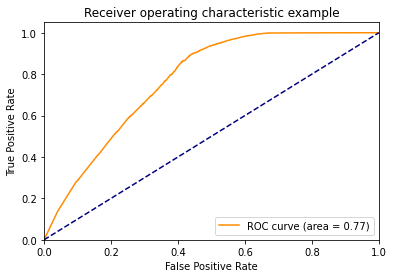

In [425]:
#code sckeleton built based on scikits examples in documentation
plt.figure()
plt.plot(fpr[0], tpr[0], color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()